# 📊 Exploratory Data Analysis: Student Exam Score Prediction

This notebook performs a comprehensive EDA on the Kaggle Playground Series S6E1 dataset.

**Objective:** Predict student exam scores based on various features like study habits, demographics, and learning conditions.

## Table of Contents
1. [Setup & Data Loading](#1-setup--data-loading)
2. [Data Overview](#2-data-overview)
3. [Missing Values & Data Quality](#3-missing-values--data-quality)
4. [Target Variable Analysis](#4-target-variable-analysis)
5. [Numerical Features Analysis](#5-numerical-features-analysis)
6. [Categorical Features Analysis](#6-categorical-features-analysis)
7. [Feature Correlations](#7-feature-correlations)
8. [Key Insights & Conclusions](#8-key-insights--conclusions)

## 1. Setup & Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Paths
DATA_DIR = Path('../data/playground-series-s6e1')

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [2]:
# Load datasets
train = pd.read_csv(DATA_DIR / 'train.csv')
test = pd.read_csv(DATA_DIR / 'test.csv')
sample_sub = pd.read_csv(DATA_DIR / 'sample_submission.csv')

print(f"Training set shape: {train.shape}")
print(f"Test set shape: {test.shape}")
print(f"Sample submission shape: {sample_sub.shape}")

Training set shape: (630000, 13)
Test set shape: (270000, 12)
Sample submission shape: (270000, 2)


## 2. Data Overview

In [3]:
# First look at the training data
train.head(10)

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.80,no,4.90,average,online videos,low,easy,78.30
1,1,18,other,diploma,4.95,94.80,yes,4.70,poor,self-study,medium,moderate,46.70
2,2,20,female,b.sc,4.68,92.60,yes,5.80,poor,coaching,high,moderate,99.00
3,3,19,male,b.sc,2.00,49.50,yes,8.30,average,group study,high,moderate,63.90
4,4,23,male,bca,7.65,86.90,yes,9.60,good,self-study,high,easy,100.00
5,5,24,male,b.com,5.04,85.10,yes,9.40,average,online videos,medium,moderate,70.10
6,6,20,male,b.sc,4.28,87.00,no,9.10,average,mixed,high,moderate,63.40
7,7,22,female,ba,4.19,44.90,yes,8.80,good,self-study,high,hard,76.80
8,8,22,other,b.com,1.06,98.30,yes,5.00,poor,mixed,low,moderate,46.70
9,9,18,male,bba,3.44,80.90,yes,6.20,good,group study,medium,easy,58.20


In [4]:
# Data types and info
print("=" * 50)
print("TRAINING DATA INFO")
print("=" * 50)
train.info()

TRAINING DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [5]:
# Statistical summary of numerical features
train.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00
mean,314999.50,20.55,4.00,71.99,7.07,62.51
std,181865.48,2.26,2.36,17.43,1.74,18.92
min,0.00,17.00,0.08,40.60,4.10,19.60
25%,157499.75,19.00,1.97,57.00,5.60,48.80
50%,314999.50,21.00,4.00,72.60,7.10,62.60
75%,472499.25,23.00,6.05,87.20,8.60,76.30
max,629999.00,24.00,7.91,99.40,9.90,100.00


In [6]:
# Identify feature types
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

# Remove id and target from numerical columns for analysis
numerical_features = [col for col in numerical_cols if col not in ['id', 'exam_score']]
target = 'exam_score'

print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")
print(f"Target variable: {target}")

Numerical features (4): ['age', 'study_hours', 'class_attendance', 'sleep_hours']
Categorical features (7): ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
Target variable: exam_score


## 3. Missing Values & Data Quality

In [7]:
# Check for missing values
def missing_values_summary(df, name):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing %': missing_pct
    })
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
    
    if len(missing_df) == 0:
        print(f"✅ {name}: No missing values found!")
    else:
        print(f"⚠️ {name}: Missing values found:")
        display(missing_df)
    return missing_df

print("MISSING VALUES ANALYSIS")
print("=" * 50)
train_missing = missing_values_summary(train, "Training set")
test_missing = missing_values_summary(test, "Test set")

MISSING VALUES ANALYSIS
✅ Training set: No missing values found!
✅ Test set: No missing values found!


In [8]:
# Check for duplicates
print("DUPLICATE CHECK")
print("=" * 50)
train_dupes = train.drop('id', axis=1).duplicated().sum()
test_dupes = test.drop('id', axis=1).duplicated().sum()
print(f"Duplicate rows in training set: {train_dupes} ({train_dupes/len(train)*100:.2f}%)")
print(f"Duplicate rows in test set: {test_dupes} ({test_dupes/len(test)*100:.2f}%)")

DUPLICATE CHECK
Duplicate rows in training set: 0 (0.00%)
Duplicate rows in test set: 0 (0.00%)


## 4. Target Variable Analysis

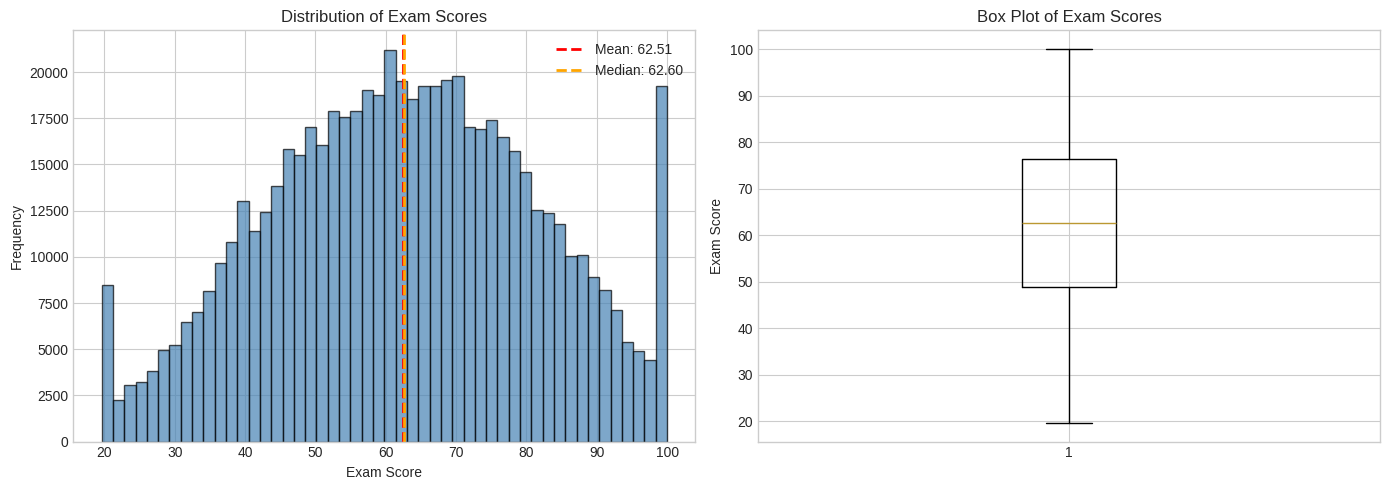


Target Variable Statistics:
count   630000.00
mean        62.51
std         18.92
min         19.60
25%         48.80
50%         62.60
75%         76.30
max        100.00
Name: exam_score, dtype: float64


In [9]:
# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train['exam_score'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(train['exam_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train["exam_score"].mean():.2f}')
axes[0].axvline(train['exam_score'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {train["exam_score"].median():.2f}')
axes[0].set_xlabel('Exam Score')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Exam Scores')
axes[0].legend()

# Box plot
axes[1].boxplot(train['exam_score'], vert=True)
axes[1].set_ylabel('Exam Score')
axes[1].set_title('Box Plot of Exam Scores')

plt.tight_layout()
plt.show()

# Statistics
print("\nTarget Variable Statistics:")
print(train['exam_score'].describe())

In [10]:
# Check for skewness
from scipy import stats

skewness = stats.skew(train['exam_score'])
kurtosis = stats.kurtosis(train['exam_score'])

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

if abs(skewness) < 0.5:
    print("→ Distribution is approximately symmetric")
elif skewness > 0:
    print("→ Distribution is right-skewed (positively skewed)")
else:
    print("→ Distribution is left-skewed (negatively skewed)")

Skewness: -0.0483
Kurtosis: -0.6190
→ Distribution is approximately symmetric


## 5. Numerical Features Analysis

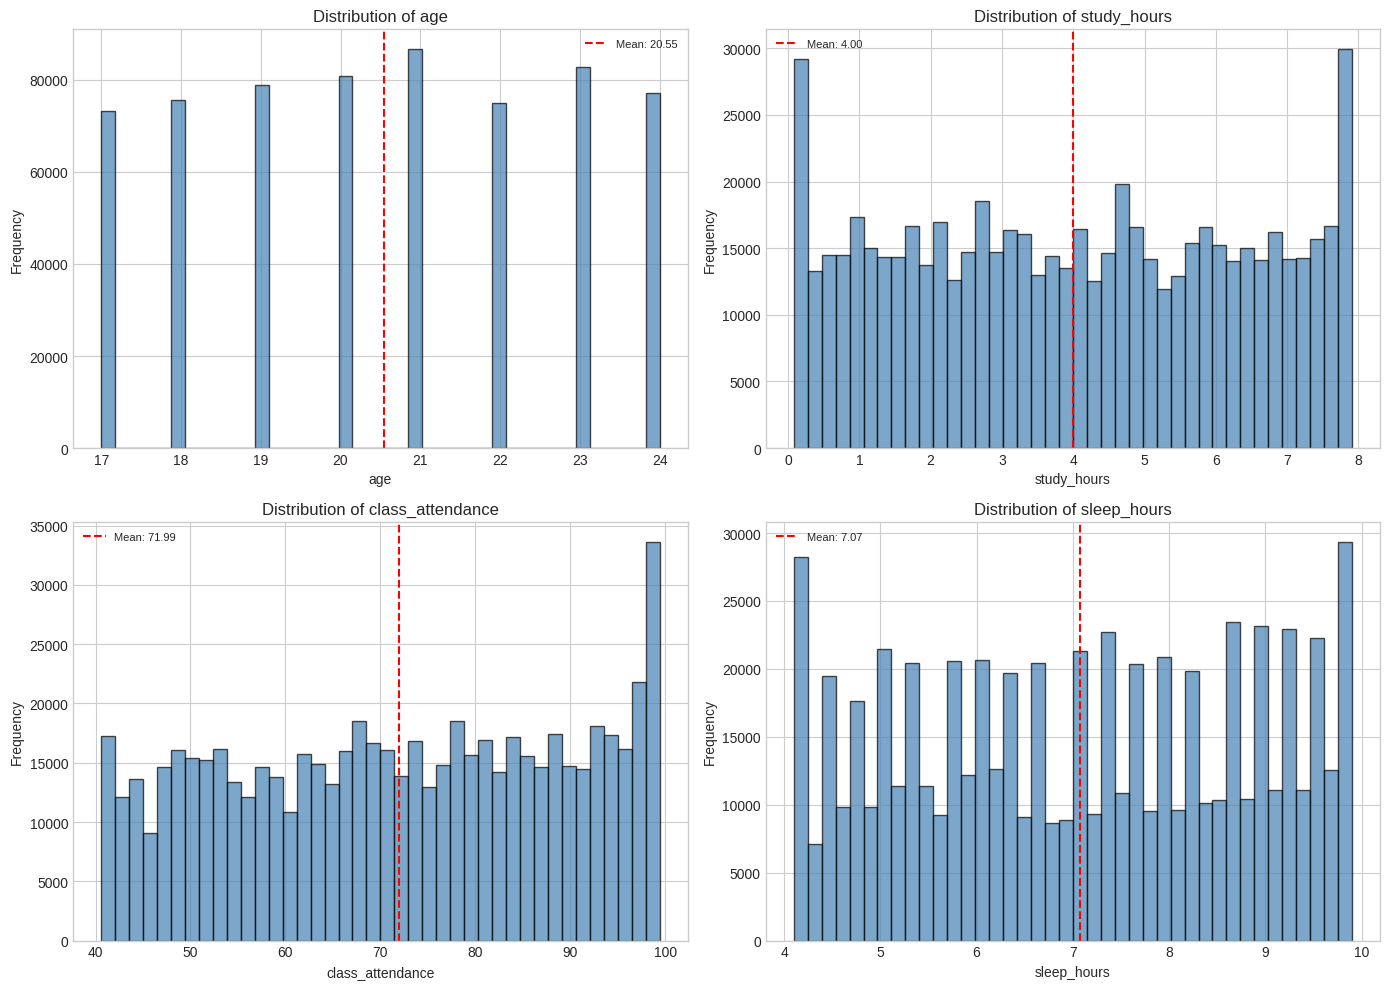

In [11]:
# Distribution of numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(train[col], bins=40, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].axvline(train[col].mean(), color='red', linestyle='--', linewidth=1.5, label=f'Mean: {train[col].mean():.2f}')
    axes[idx].legend(fontsize=8)

plt.tight_layout()
plt.show()

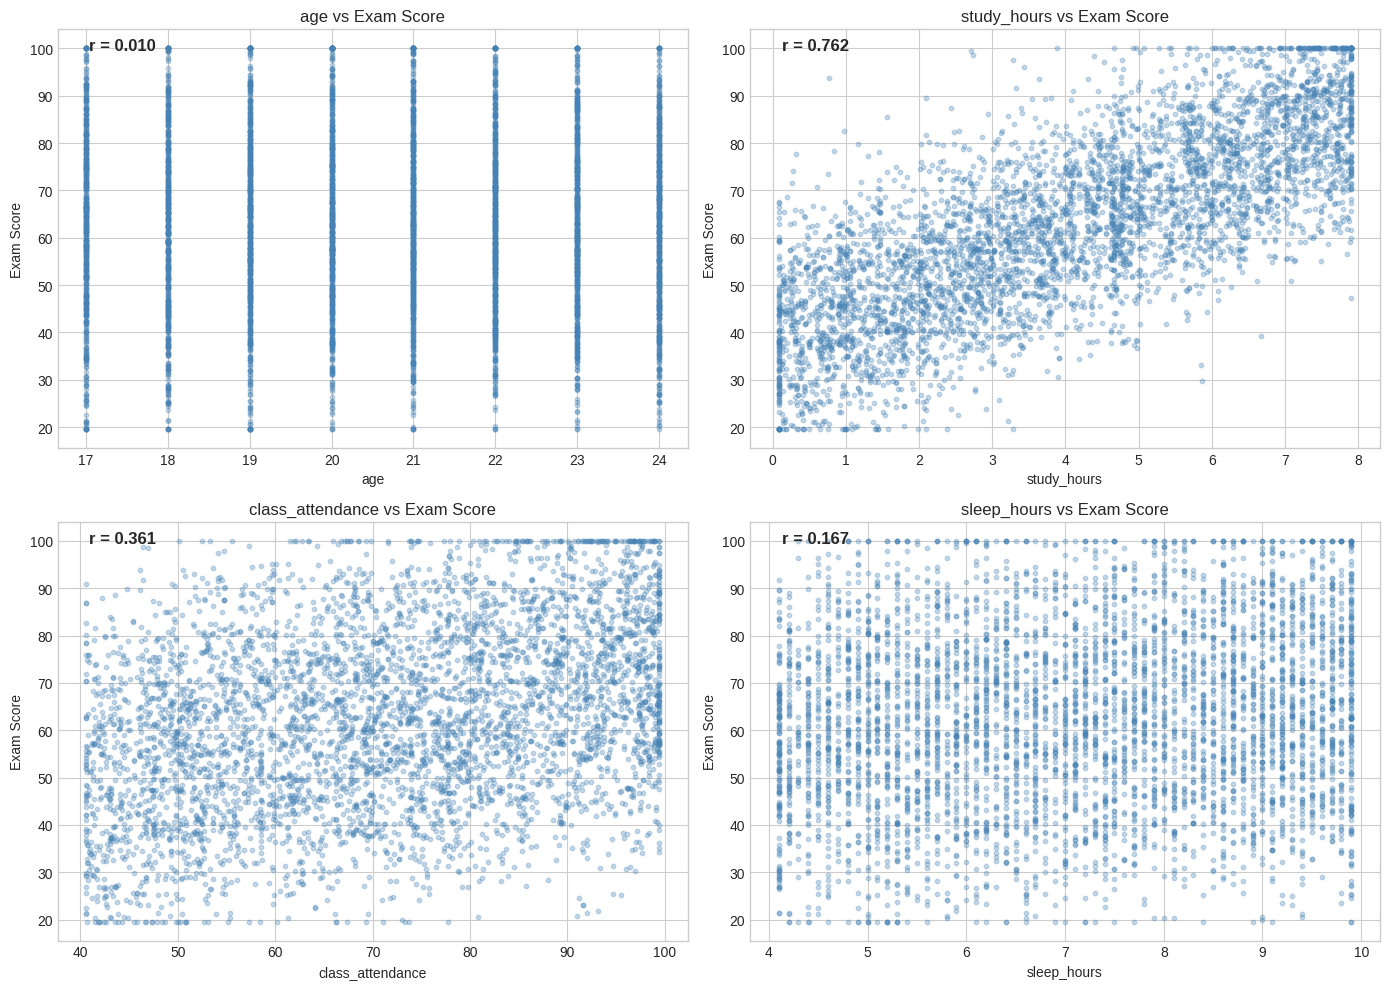

In [12]:
# Scatter plots: Numerical features vs Target
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    # Use sample for better visualization
    sample = train.sample(min(5000, len(train)), random_state=42)
    axes[idx].scatter(sample[col], sample['exam_score'], alpha=0.3, s=10, color='steelblue')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Exam Score')
    axes[idx].set_title(f'{col} vs Exam Score')
    
    # Add correlation
    corr = train[col].corr(train['exam_score'])
    axes[idx].annotate(f'r = {corr:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Categorical Features Analysis

In [13]:
# Value counts for categorical features
for col in categorical_cols:
    print(f"\n{col.upper()} - Unique values: {train[col].nunique()}")
    print(train[col].value_counts())


GENDER - Unique values: 3
gender
other     211097
male      210593
female    208310
Name: count, dtype: int64

COURSE - Unique values: 7
course
b.tech     131236
b.sc       111554
b.com      110932
bca         88721
bba         75644
ba          61989
diploma     49924
Name: count, dtype: int64

INTERNET_ACCESS - Unique values: 2
internet_access
yes    579423
no      50577
Name: count, dtype: int64

SLEEP_QUALITY - Unique values: 3
sleep_quality
poor       213675
good       213089
average    203236
Name: count, dtype: int64

STUDY_METHOD - Unique values: 5
study_method
coaching         131697
self-study       131131
mixed            123086
group study      123009
online videos    121077
Name: count, dtype: int64

FACILITY_RATING - Unique values: 3
facility_rating
medium    214082
low       212378
high      203540
Name: count, dtype: int64

EXAM_DIFFICULTY - Unique values: 3
exam_difficulty
moderate    353982
easy        176540
hard         99478
Name: count, dtype: int64


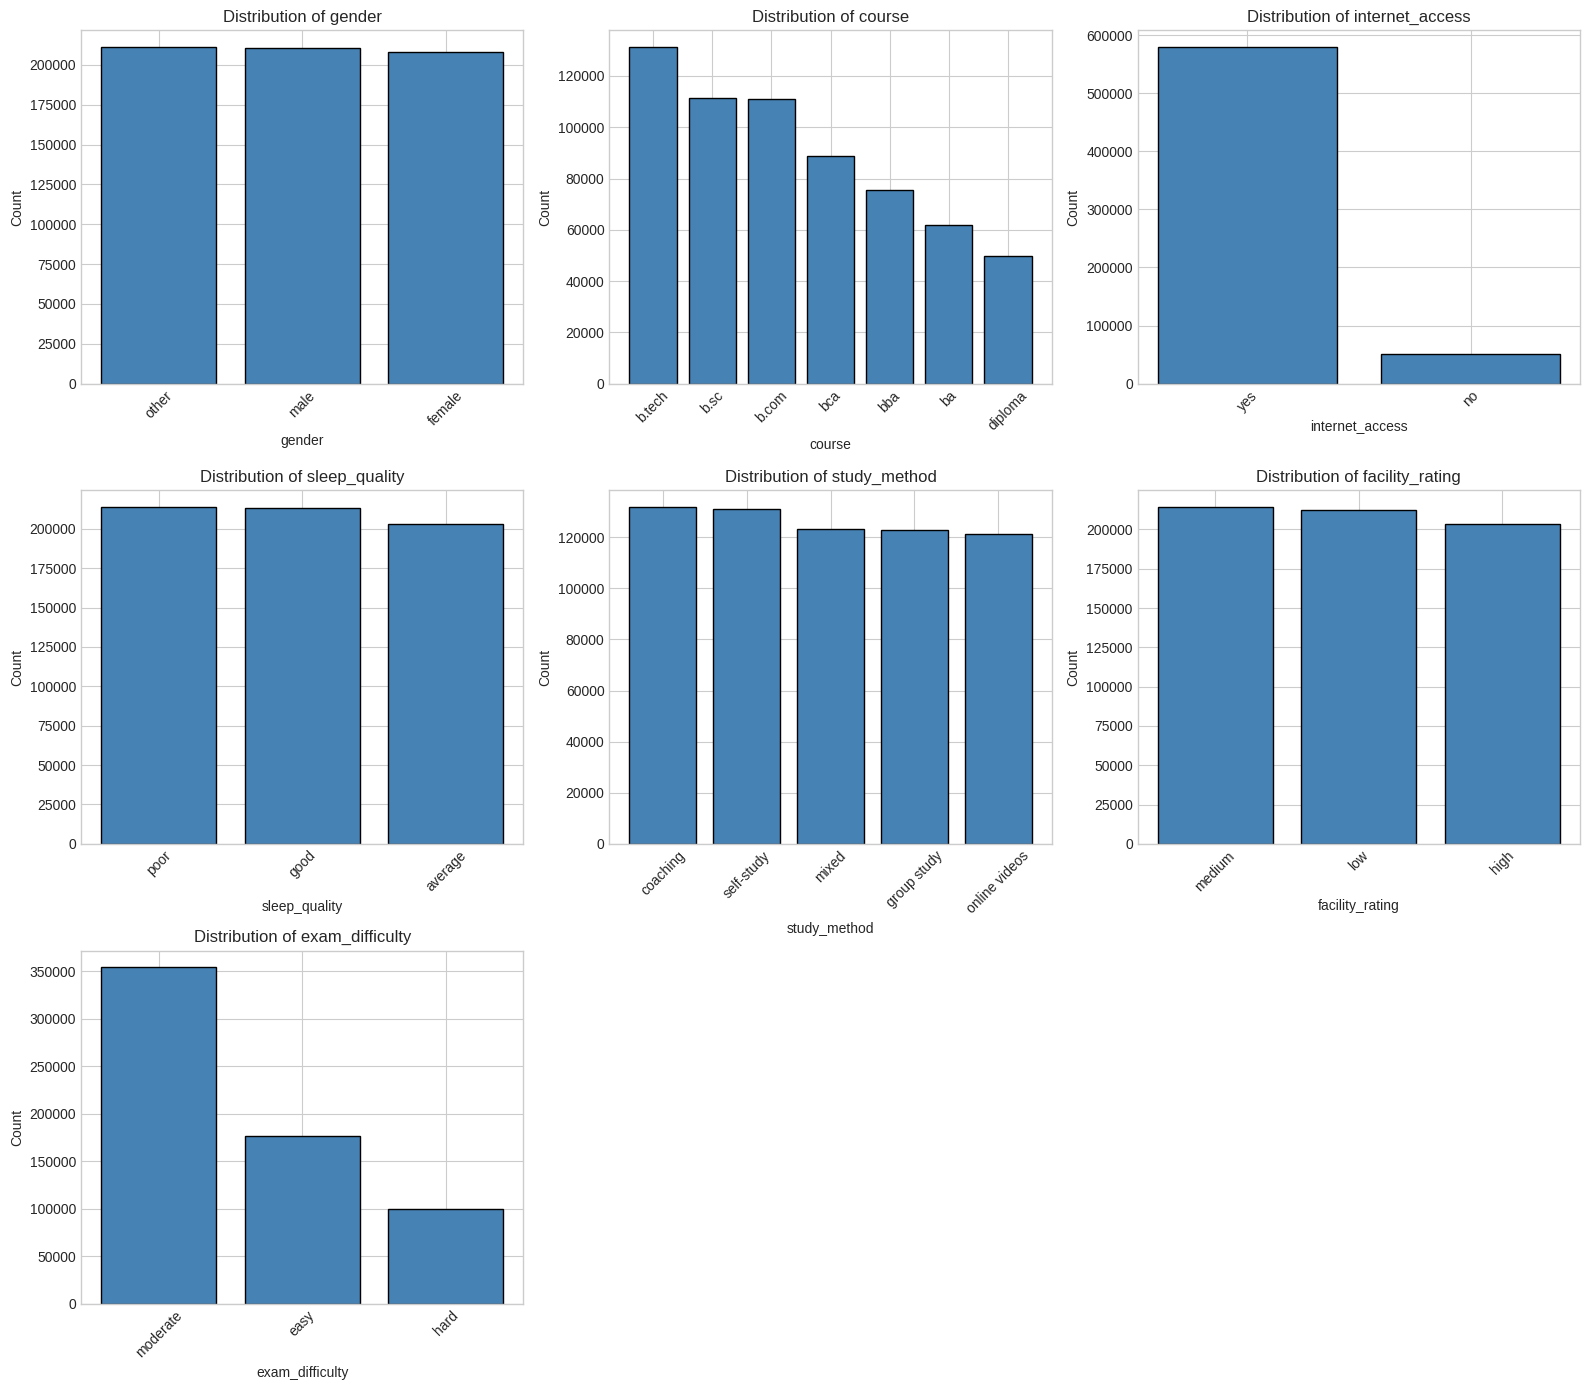

In [14]:
# Distribution of categorical features
fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    counts = train[col].value_counts()
    axes[idx].bar(counts.index, counts.values, color='steelblue', edgecolor='black')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)

# Hide empty subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

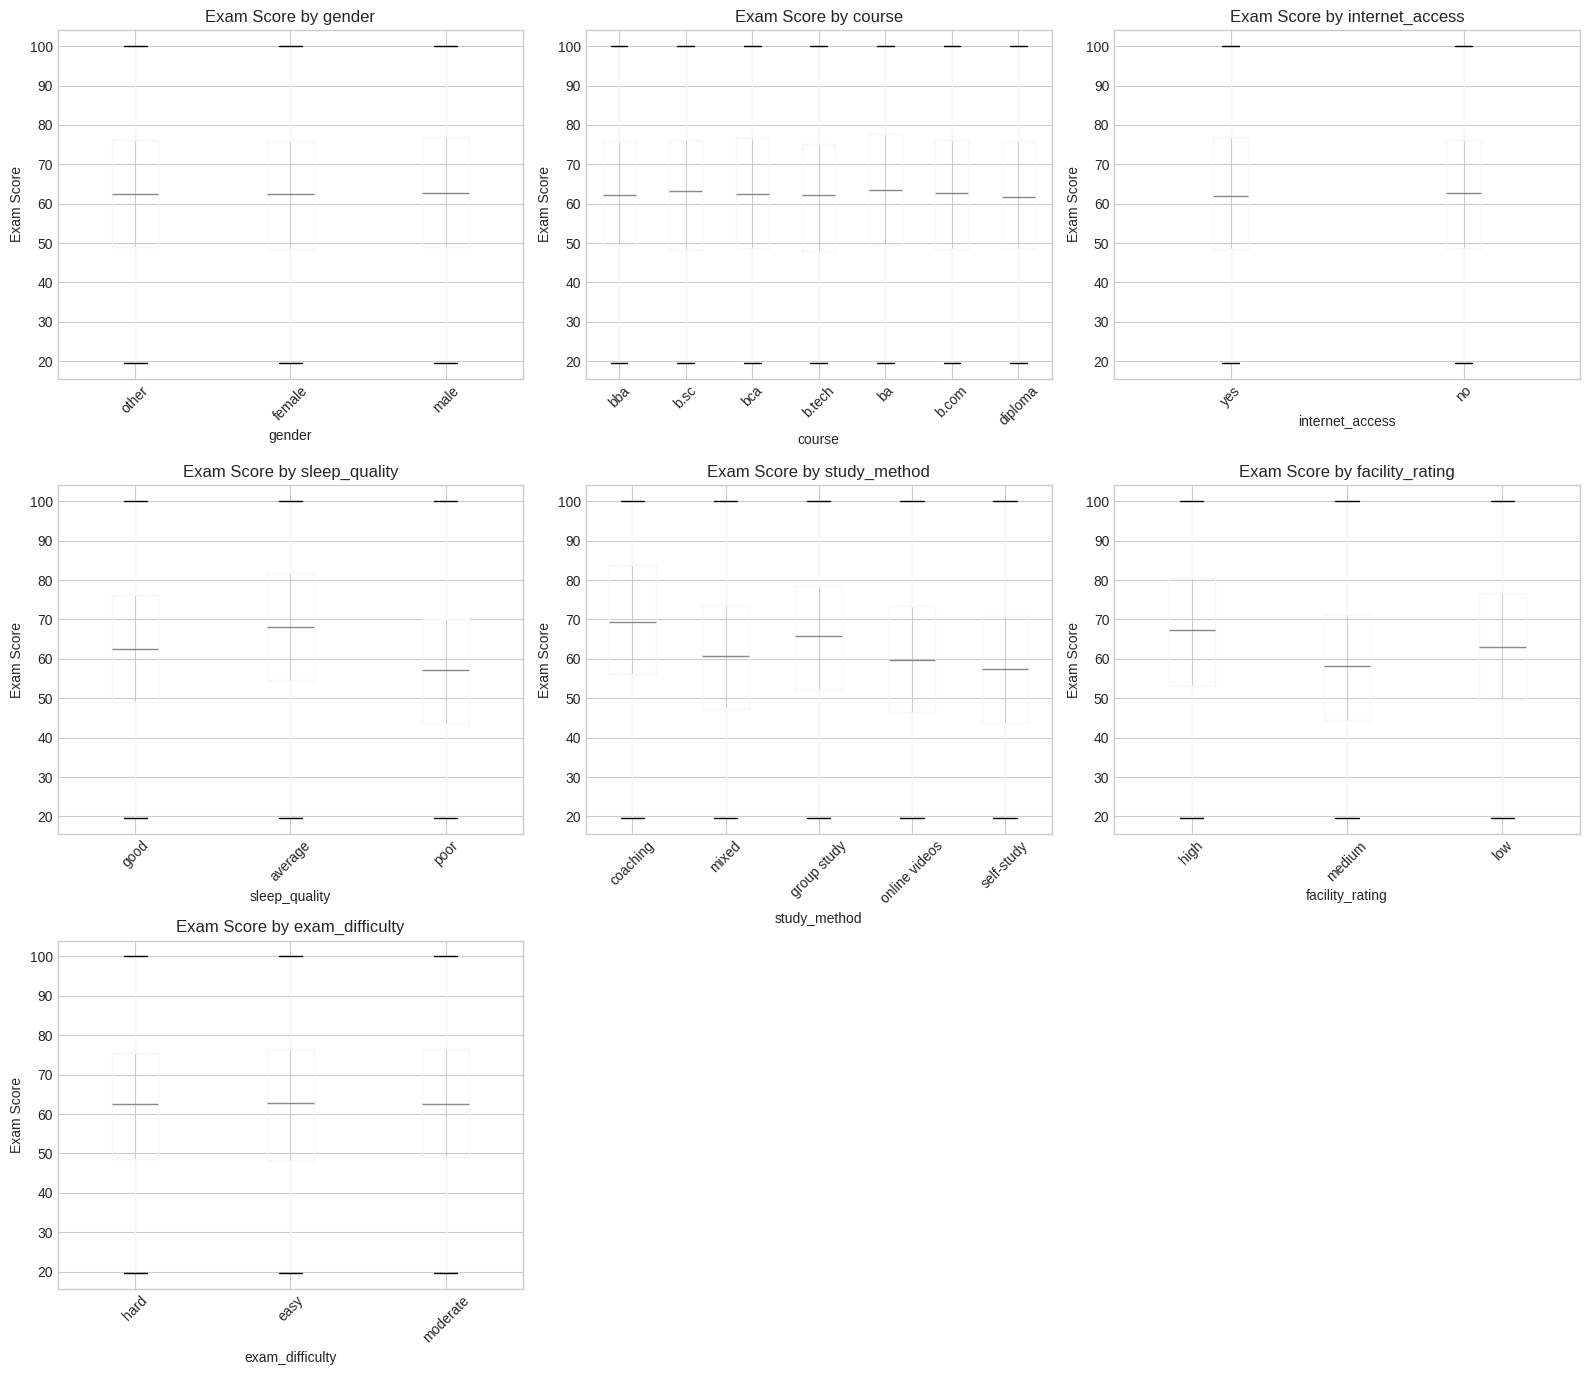

In [15]:
# Box plots: Categorical features vs Target
fig, axes = plt.subplots(3, 3, figsize=(16, 14))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    order = train.groupby(col)['exam_score'].median().sort_values(ascending=False).index
    train.boxplot(column='exam_score', by=col, ax=axes[idx], positions=range(len(order)))
    axes[idx].set_xticklabels(order, rotation=45)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Exam Score')
    axes[idx].set_title(f'Exam Score by {col}')

# Hide empty subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

In [16]:
# Mean exam score by categorical features
print("MEAN EXAM SCORE BY CATEGORICAL FEATURES")
print("=" * 60)

for col in categorical_cols:
    print(f"\n{col}:")
    print(train.groupby(col)['exam_score'].agg(['mean', 'std', 'count']).round(2).sort_values('mean', ascending=False))

MEAN EXAM SCORE BY CATEGORICAL FEATURES

gender:
        mean   std   count
gender                    
other  62.78 19.09  211097
female 62.56 18.89  208310
male   62.18 18.77  210593

course:
         mean   std   count
course                     
bba     63.23 19.16   75644
bca     62.59 18.92   88721
b.com   62.54 18.40  110932
b.tech  62.52 18.86  131236
diploma 62.40 19.09   49924
b.sc    62.30 19.30  111554
ba      61.89 18.77   61989

internet_access:
                 mean   std   count
internet_access                    
yes             62.51 18.89  579423
no              62.48 19.28   50577

sleep_quality:
               mean   std   count
sleep_quality                    
good          67.88 18.12  213089
average       62.66 18.60  203236
poor          57.00 18.42  213675

study_method:
               mean   std   count
study_method                     
coaching      69.27 18.45  131697
mixed         65.10 18.22  123086
group study   60.53 18.22  123009
online videos 59.73 18

## 7. Feature Correlations

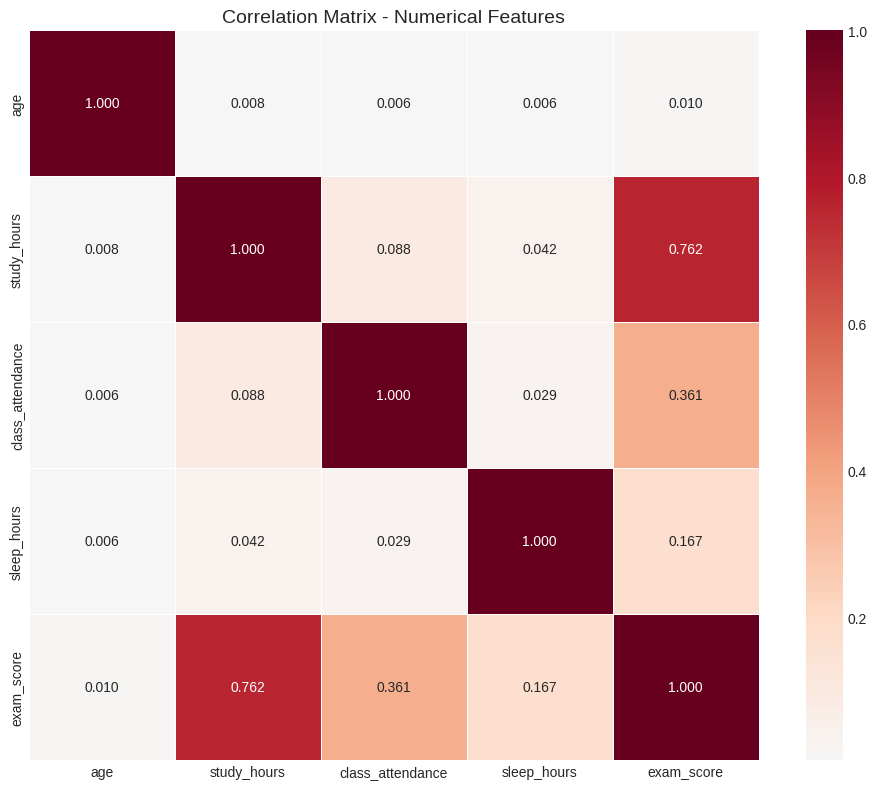

In [17]:
# Correlation matrix for numerical features
numerical_for_corr = numerical_features + ['exam_score']
corr_matrix = train[numerical_for_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.3f',
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()

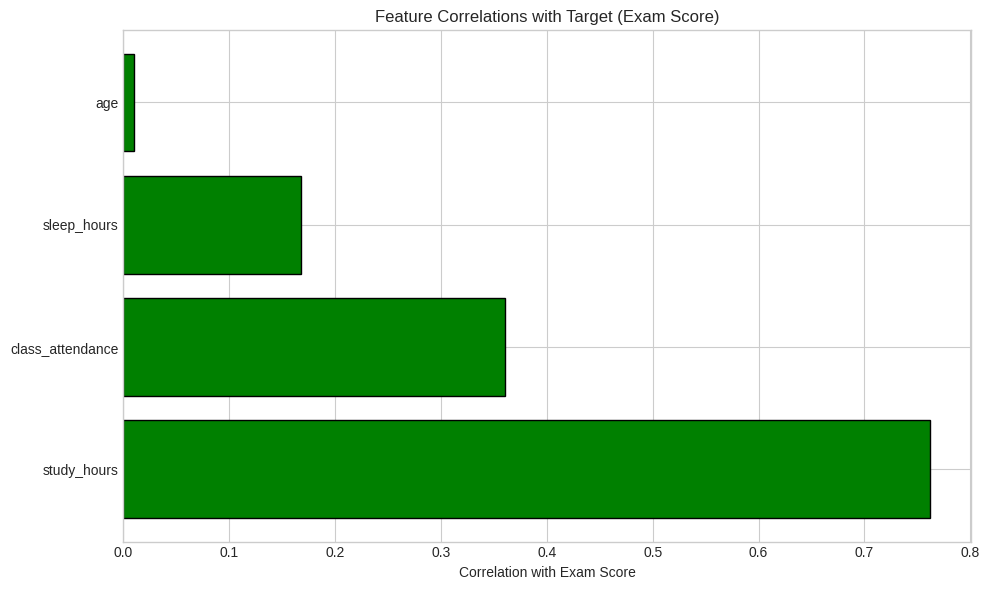


Correlations with Exam Score:
study_hours        0.76
class_attendance   0.36
sleep_hours        0.17
age                0.01
Name: exam_score, dtype: float64


In [18]:
# Correlations with target variable
target_corr = train[numerical_for_corr].corr()['exam_score'].drop('exam_score').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in target_corr.values]
plt.barh(target_corr.index, target_corr.values, color=colors, edgecolor='black')
plt.xlabel('Correlation with Exam Score')
plt.title('Feature Correlations with Target (Exam Score)')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\nCorrelations with Exam Score:")
print(target_corr)

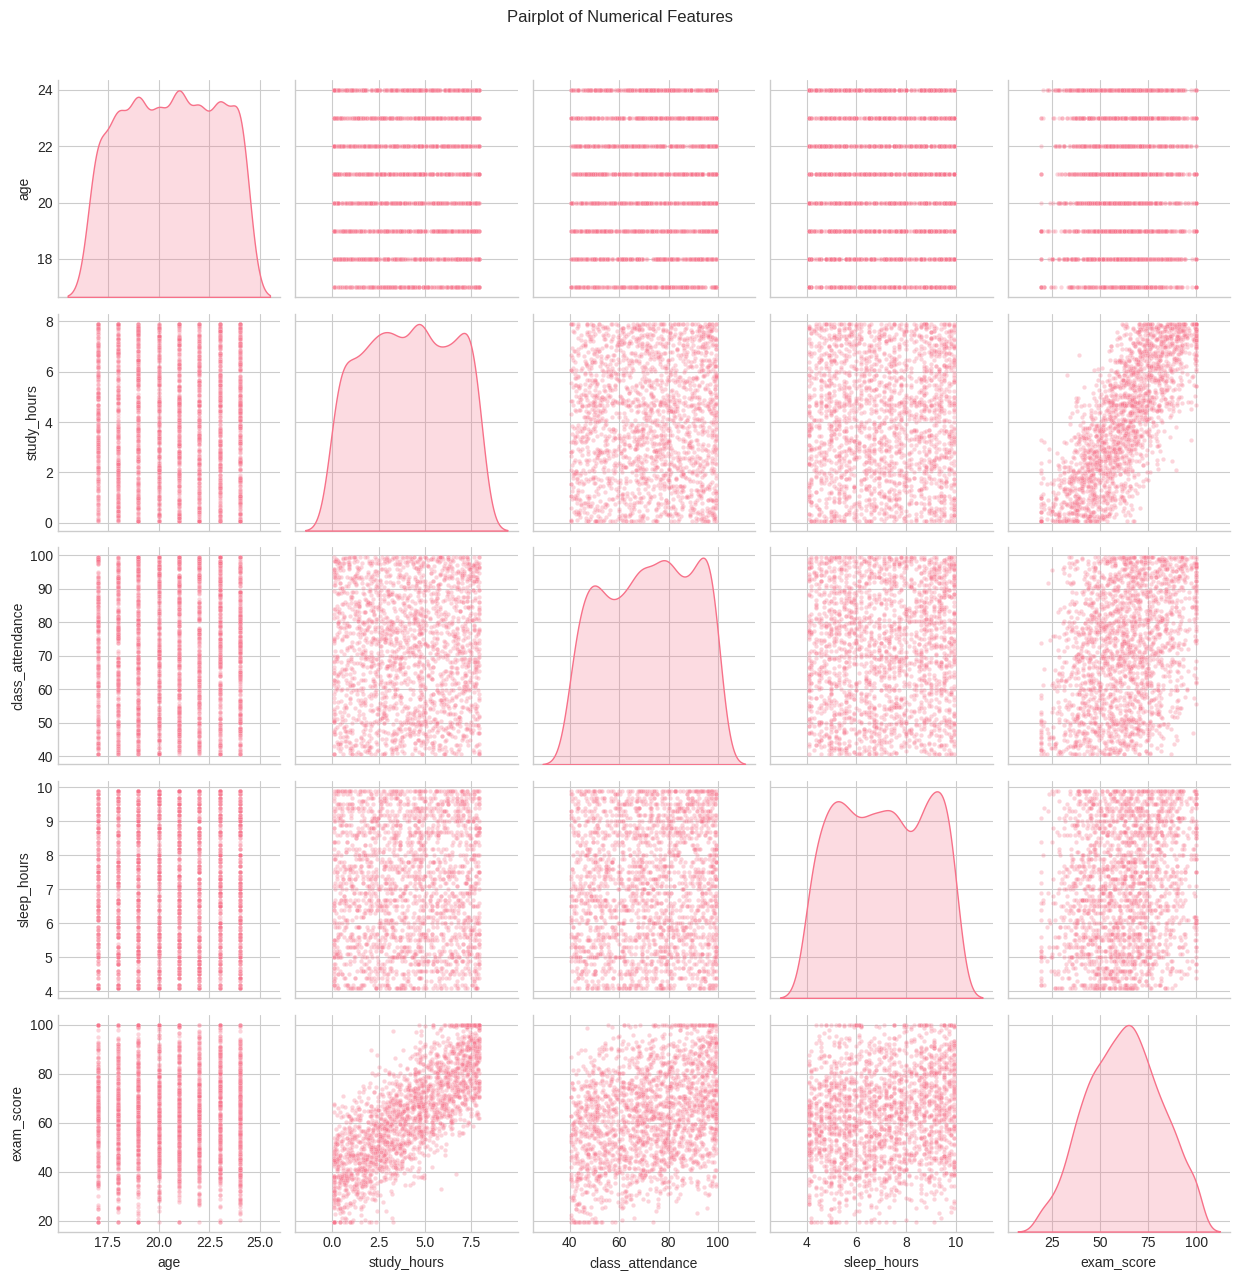

In [19]:
# Pairplot for key features (sampled for performance)
sample_for_pairplot = train[numerical_for_corr].sample(min(2000, len(train)), random_state=42)
sns.pairplot(sample_for_pairplot, diag_kind='kde', plot_kws={'alpha': 0.3, 's': 10})
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

## 8. Key Insights & Conclusions

In [20]:
# Summary statistics
print("=" * 60)
print("DATASET SUMMARY")
print("=" * 60)
print(f"\n📊 Dataset Size:")
print(f"   - Training samples: {len(train):,}")
print(f"   - Test samples: {len(test):,}")
print(f"   - Features: {len(train.columns) - 2} (excluding id and target)")

print(f"\n📈 Target Variable (exam_score):")
print(f"   - Range: {train['exam_score'].min():.1f} - {train['exam_score'].max():.1f}")
print(f"   - Mean: {train['exam_score'].mean():.2f}")
print(f"   - Median: {train['exam_score'].median():.2f}")
print(f"   - Std: {train['exam_score'].std():.2f}")

print(f"\n🔢 Feature Types:")
print(f"   - Numerical: {len(numerical_features)} ({', '.join(numerical_features)})")
print(f"   - Categorical: {len(categorical_cols)} ({', '.join(categorical_cols)})")

print(f"\n✅ Data Quality:")
print(f"   - Missing values: None")
print(f"   - Duplicate rows (train): {train_dupes:,}")

DATASET SUMMARY

📊 Dataset Size:
   - Training samples: 630,000
   - Test samples: 270,000
   - Features: 11 (excluding id and target)

📈 Target Variable (exam_score):
   - Range: 19.6 - 100.0
   - Mean: 62.51
   - Median: 62.60
   - Std: 18.92

🔢 Feature Types:
   - Numerical: 4 (age, study_hours, class_attendance, sleep_hours)
   - Categorical: 7 (gender, course, internet_access, sleep_quality, study_method, facility_rating, exam_difficulty)

✅ Data Quality:
   - Missing values: None
   - Duplicate rows (train): 0


### Key Findings

**📊 Data Overview:**
- Large dataset with 630K training samples and 270K test samples
- Clean data with no missing values
- Mix of numerical (4) and categorical (7) features

**🎯 Target Variable:**
- Exam scores range from ~0 to 100
- Approximately normal distribution

**🔑 Important Features:**
- **Numerical:** `study_hours`, `class_attendance`, `sleep_hours` all show relationships with exam score
- **Categorical:** `study_method`, `sleep_quality`, `exam_difficulty`, and `facility_rating` affect performance

**💡 Modeling Recommendations:**
1. Consider tree-based models (LightGBM, XGBoost) which handle mixed feature types well
2. Label/ordinal encode ordered categories (sleep_quality, facility_rating, exam_difficulty)
3. One-hot encode unordered categories (gender, course, study_method)
4. Feature engineering opportunities: interaction between study_hours and attendance